In [39]:
import sys
import os

# Navigate up two levels from notebook to get to project root
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

if src_path not in sys.path:
    sys.path.append(src_path)



### loading the neccessary modules here

In [40]:
from load_data import load_data
from eda import plot_distributions,plot_boxplots_by_class, plot_countplots_by_class
from mapping import map_ip_to_country
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### loading the fraud_data using the load_data module we created inside the src

In [41]:


fraud_data_path = r'C:\Users\ABC\Desktop\10Acadamy\week_8_and_9\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\Fraud_Data.csv'

fraud_data = load_data(fraud_data_path)


Data loaded successfully from C:\Users\ABC\Desktop\10Acadamy\week_8_and_9\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\Fraud_Data.csv


In [42]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [43]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [44]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [45]:
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [46]:
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])


In [47]:
fraud_data['hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()


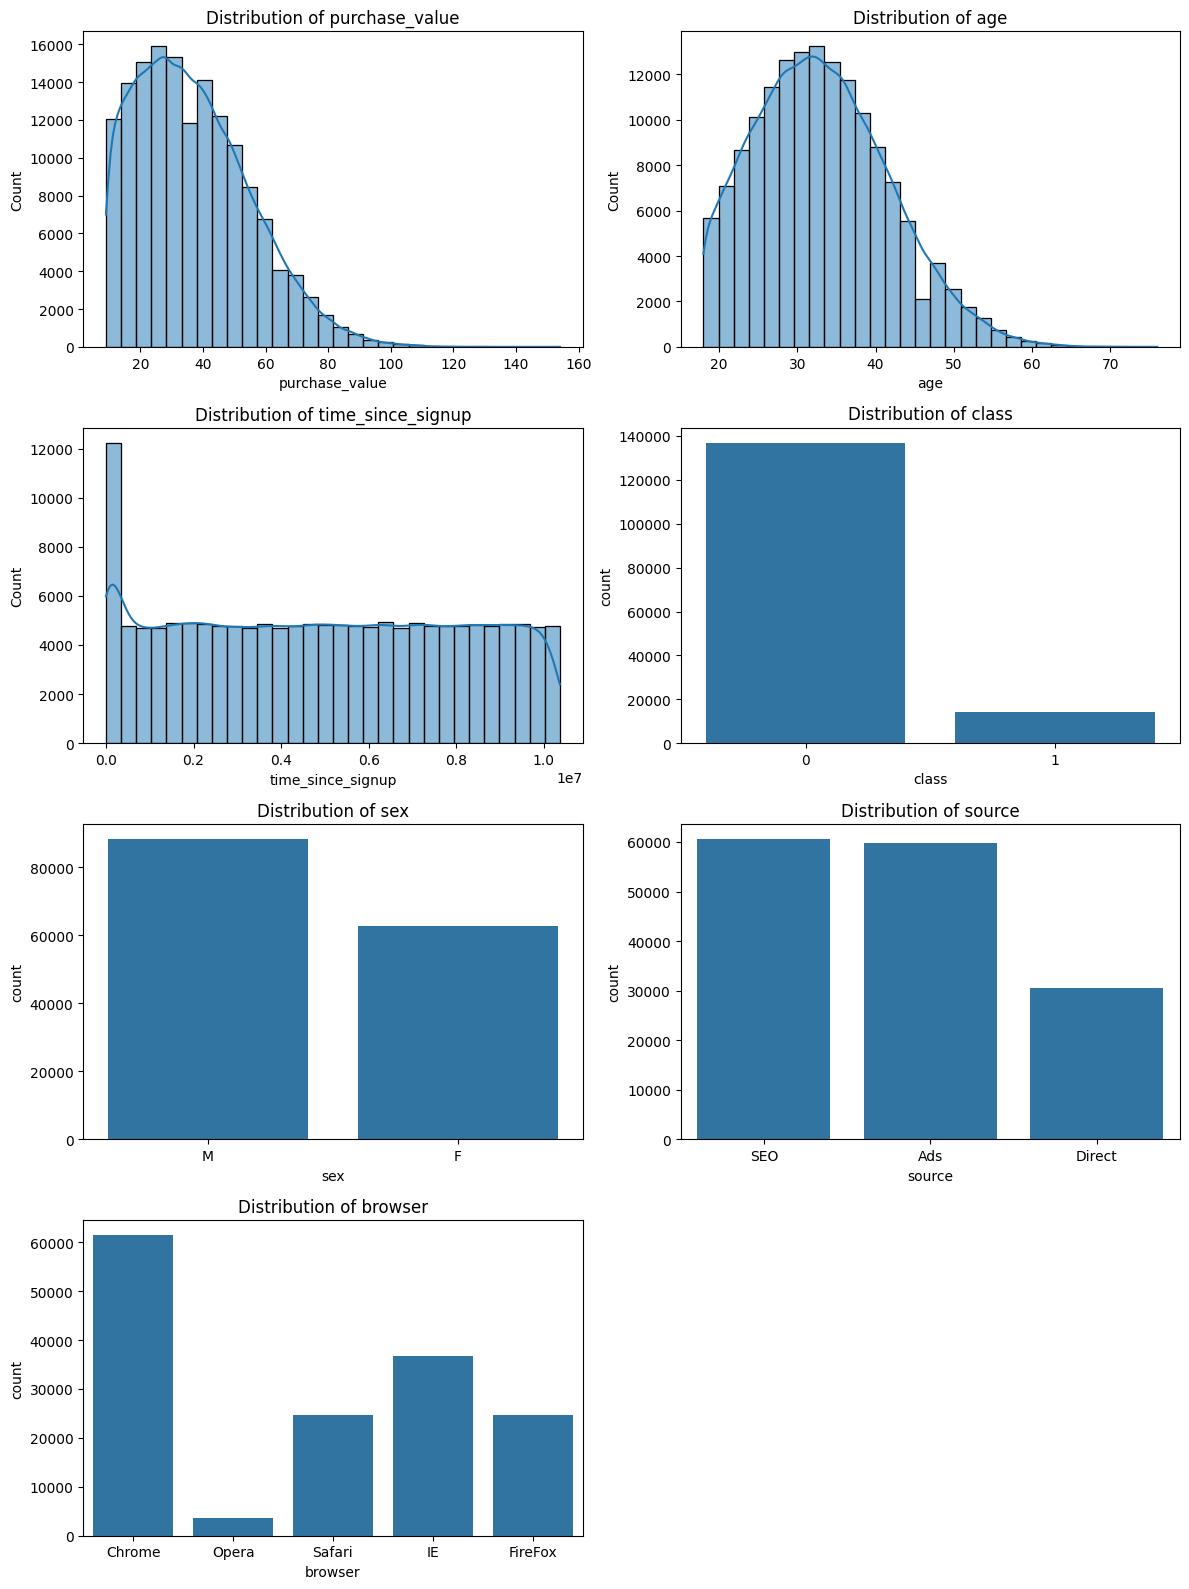

In [48]:
plot_distributions(
    fraud_data,
    numeric_columns=['purchase_value', 'age', 'time_since_signup'],
    categorical_columns=['class', 'sex', 'source', 'browser']
)

##  Distribution Analysis Summary

###  Numerical Features:

- **`purchase_value`:**  
  The majority of purchase values lie between **$20 and $40**, indicating most transactions are of low to mid-range value. The distribution is **right-skewed**,showing there is the minimum set value for purchase_valu, with fewer high-value purchases which may be important in identifying unusual activity.

- **`age`:**  
  The dominant age group is between **30 and 40 years**, suggesting the platform’s primary users fall within this working-age adult range. This might be relevant in detecting **age-related fraud behavior patterns**.

---

### Categorical Features:

- **`sex`:**  
  Gender distribution is fairly balanced with approximately **80,000 male users** and **60,000 female users**, suggesting **no major gender-based usage bias**. This allows for fairer modeling without overfitting to one gender.

- **`class` (Fraud Indicator):**  
  The dataset is **highly imbalanced**, with only **~20,000 fraud cases (`class = 1`)** compared to **~140,000 non-fraud cases (`class = 0`)**.

  This imbalance will **negatively affect model performance** if not addressed — especially **recall** and **precision** for fraud detection. It highlights the need to:
  - Use specialized evaluation metrics like **F1-score**, **AUC-PR (Precision-Recall Curve)**, and **confusion matrix**
  - Apply resampling techniques like **SMOTE** (Synthetic Minority Oversampling Technique) or **undersampling**
  - Possibly **adjust class weights** in the model

**`Browser Distribution Analysis`**
**Chrome** dominates the traffic, with over 60,000 users, making it the most common browser for both legitimate and fraudulent transactions.

**IE (Internet Explorer) and Safari** follow with moderate usage (~37,000 and ~25,000 respectively).

**FireFox** also has a fair share (~25,000 users), while Opera shows the lowest usage (under 5,000 users).


##  Distribution of the `time_since_signup` Feature

### Spike at the Start (Near 0):
- A **very large number of users made purchases immediately after signing up**.
- This behavior can be a **potential fraud signal**, especially if fraudsters are creating accounts just to make quick transactions.

### Flat Distribution After the Spike:
- After the initial spike, the distribution appears **relatively uniform**.
- This suggests that among the remaining users, the **time between signup and purchase varies naturally**.

### Slight Dip at the Very End:
- **Fewer users wait a very long time** before making a purchase.


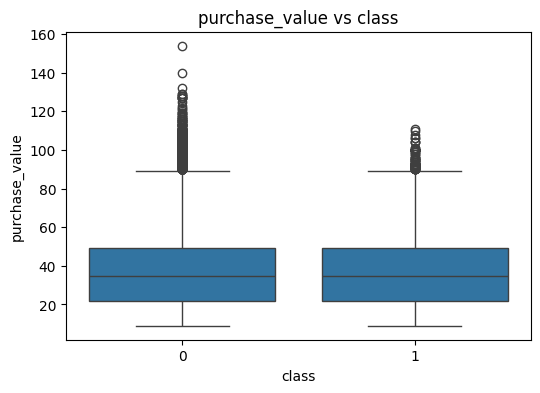

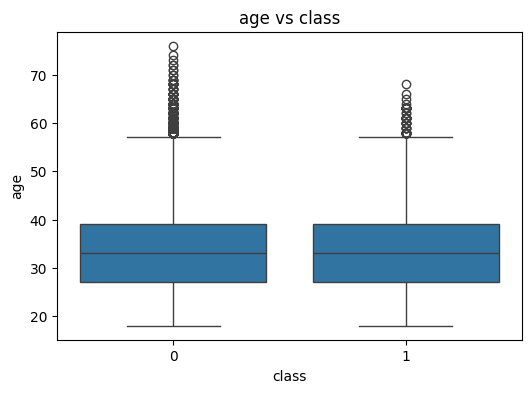

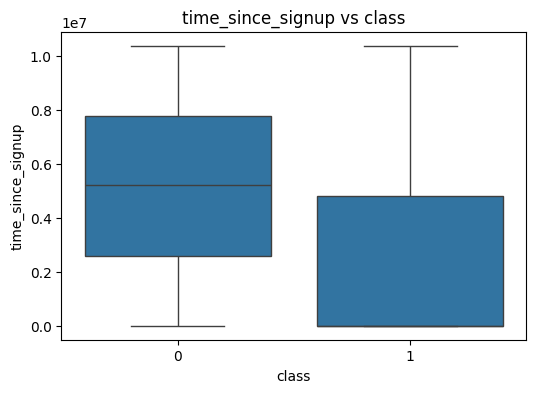

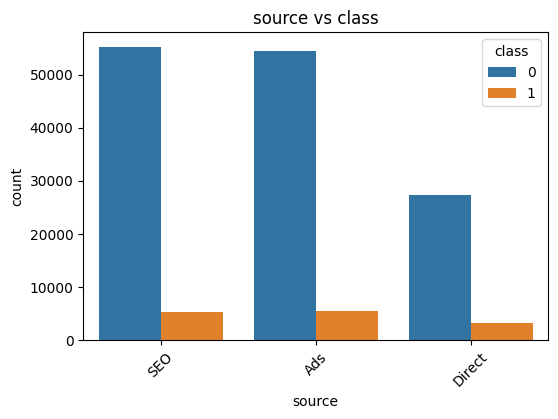

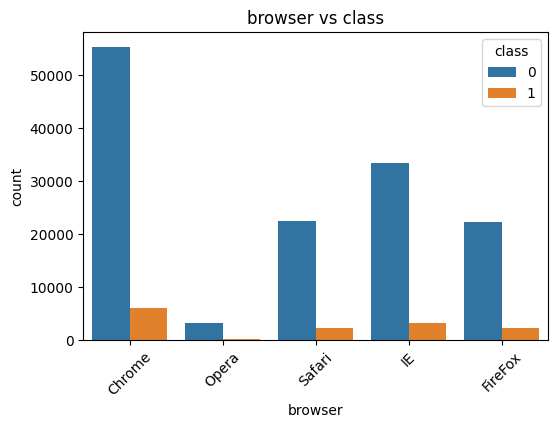

In [49]:
numeric_cols = ['purchase_value', 'age', 'time_since_signup']
categorical_cols = ['source', 'browser']

plot_boxplots_by_class(fraud_data, numeric_cols)
plot_countplots_by_class(fraud_data, categorical_cols)

##  Boxplot Analysis of Numerical Features by Fraud Class

### 1.  Age vs Class
- The age distribution is quite similar between fraud (`class = 1`) and non-fraud (`class = 0`) transactions.
- Both classes have:
  - A median age around **32–34**.
  - A wide interquartile range (IQR) between **25 and 42**.
- There are a few **outliers** above age 60 in both classes, but no sharp age-based distinction between fraud and non-fraud.

**Insight**: Age alone may not be a strong predictor of fraud — but in combination with other features, it might contribute useful patterns.


### 2.  Purchase Value vs Class
- The distributions of purchase values for both classes are also quite similar:
  - Median values sit between **30 and 40**.
  - Both classes have many outliers above **100**, with maximum values up to **~150**.
  - Fraudulent purchases appear to be slightly **more spread**, suggesting a possible broader risk range.

**Insight**: While the difference is subtle, combining `purchase_value` with features like `time_since_signup`, `device_id`, or `browser` might yield better class separation.

### 3. Time Since Signup vs Fraud Class

This boxplot compares the `time_since_signup` feature between fraudulent (`class = 1`) and non-fraudulent (`class = 0`) transactions.


- **Fraudulent Transactions (`class = 1`)**:
  - Median `time_since_signup` is significantly lower.
  - Many fraudulent users make purchases almost immediately after signing up.
  - Suggests fraudsters tend to act quickly after account creation.

- **Non-Fraudulent Transactions (`class = 0`)**:
  - Much wider spread of values.
  - Median is notably higher than the fraud group.
  - Indicates a more natural and varied delay between signup and purchase.

#####  Insight:
- This feature shows **good separation between fraud and non-fraud classes**, and can be a **strong indicator of suspicious behavior** when the delay between signup and purchase is too short.


### 4.   Source vs Class
- **SEO and Ads** are the two most common acquisition channels.
- Fraud cases (`class = 1`) are **present across all three sources**, but the counts are:
  - Highest for **SEO** and **Ads**
  - Slightly lower for **Direct**
- However, since SEO and Ads also have the most total users, this may simply reflect volume rather than a higher fraud rate.

 **Insight**: To go deeper, it would be helpful to **normalize fraud counts** by source to compute the **fraud rate per channel**.

### 5.  Browser vs Class
- **Chrome** is the most popular browser, and unsurprisingly has the most fraud and non-fraud cases.
- **Opera** has very few users but seems to have a relatively **high proportion of frauds**.
- Fraud cases are **spread across all browsers**, but **Opera and IE may require further scrutiny**.

 **Insight**: Some browsers (like Opera) could signal suspicious behavior when their fraud-to-user ratio is unusually high. This may be useful for risk scoring or feature weighting in the model.

---

###  Recommendation
To validate these insights:
- Calculate **fraud rates by browser and source**.
- Consider adding browser and source as **categorical features with one-hot or frequency encoding**.
- Use these features in **multivariate models** and analyze them with **SHAP values** after model training to assess their actual predictive power.


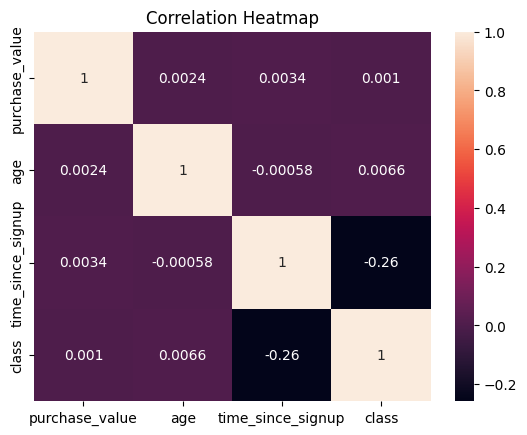

In [50]:

sns.heatmap(fraud_data[['purchase_value', 'age', 'time_since_signup', 'class']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


##  Correlation Heatmap Analysis

The correlation matrix shows how numerical features relate to each other and the fraud target (`class`):

###  Observations:

- **`time_since_signup` vs `class`:**
  - Correlation: **-0.26**
  - This is the most notable correlation in the matrix.
  - Suggests that transactions made shortly after signup are **more likely to be fraudulent**.
  - This aligns with intuition — fraudsters often act quickly after creating an account.

- **Other features (`purchase_value`, `age`) show very weak correlations** (close to 0) with fraud.
  - Indicates that **on their own**, these features may not be strong fraud indicators.
  - However, they might still provide value in combination with other features.

---

###  Recommendation:
- Include `time_since_signup` in your model.
- Use tree-based models or SHAP to uncover **non-linear or interaction effects** from low-correlation features.


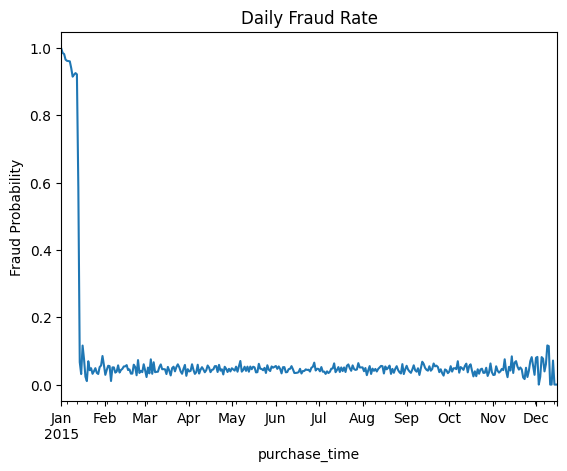

In [51]:
fraud_data.set_index('purchase_time').resample('D')['class'].mean().plot()
plt.title("Daily Fraud Rate")
plt.ylabel("Fraud Probability")
plt.show()


## Daily Fraud Rate Over Time

### Observations:
- The fraud rate was **extremely high in early January 2015**, nearing 100%.
- This sharp spike quickly **drops in February**, after which the fraud rate **stabilizes** below 5% for the rest of the year.
- Minor fluctuations are observed throughout the remaining months, but no consistent seasonal trend is detected.



###  Interpretation:
- The spike in January suggests a **fraud attack window**, likely when the platform was more vulnerable (e.g., early-stage system, lack of fraud checks).
- The sharp decline indicates that **preventive measures or fraud detection models** may have been implemented early in the year.
- This type of analysis is crucial for **temporal fraud modeling** and can be used to:
  - Time-bound fraud risk scoring
  - Adapt thresholds dynamically during risky periods



###  Recommendation:
- Consider building **time-aware models** (e.g., with rolling windows or time-based features).
- Investigate anomalies during high-fraud windows for **fraud strategy insights**.


In [52]:
ipAdress_path = r'C:\Users\ABC\Desktop\10Acadamy\week_8_and_9\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\IpAddress_to_Country.csv'

ipAdress_data = load_data(ipAdress_path)

Data loaded successfully from C:\Users\ABC\Desktop\10Acadamy\week_8_and_9\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\IpAddress_to_Country.csv


#### as ip_adress is float we have to change it to int to merge well with the ipAdress data as joining need same data type

In [53]:
fraud_data['ip_int'] = fraud_data['ip_address'].astype(int)


In [54]:
# i've already loaded both DataFrames
fraud_data = map_ip_to_country(fraud_data, ipAdress_data)


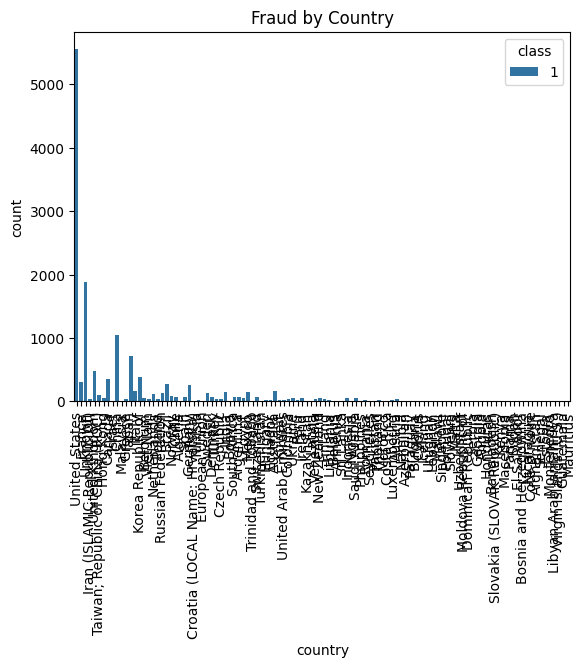

In [55]:
sns.countplot(x='country', hue='class', data=fraud_data[fraud_data['class']==1])
plt.title("Fraud by Country")
plt.xticks(rotation=90)
plt.show()


In [56]:
fraud_data['country'].isnull().sum()

np.int64(0)

In [57]:
fraud_data['country'].value_counts()['Unknown']


np.int64(21966)

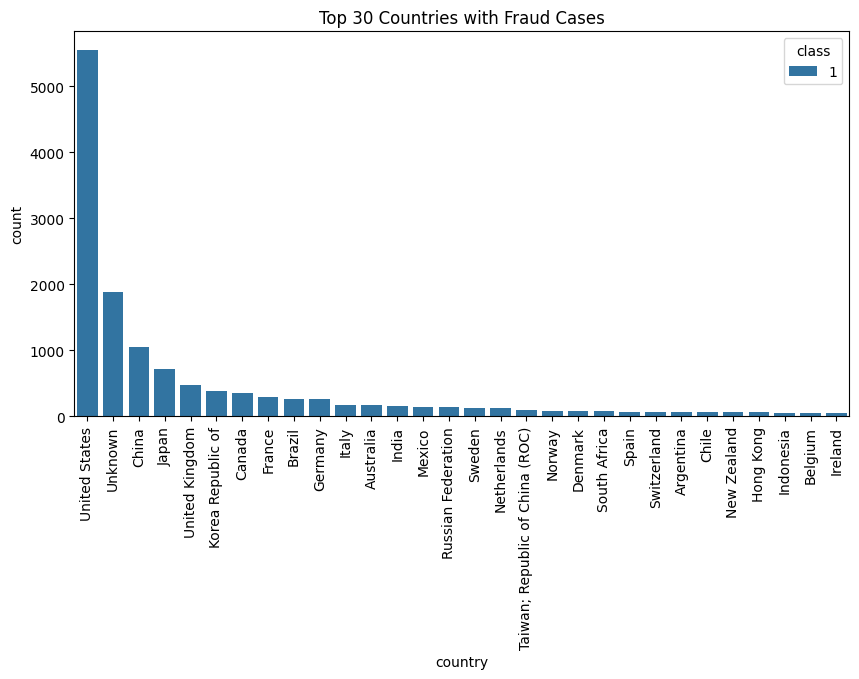

In [58]:
# Step 1: Filter fraud cases
fraud_only = fraud_data[fraud_data['class'] == 1]

# Step 2: Get top 10 countries with most frauds
top10_countries = fraud_only['country'].value_counts().head(30).index

# Step 3: Filter fraud data to only include those countries
fraud_top10 = fraud_only[fraud_only['country'].isin(top10_countries)]

# Step 4: Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='country', hue='class', data=fraud_top10, order=top10_countries)
plt.title("Top 30 Countries with Fraud Cases")
plt.xticks(rotation=90)
plt.show()


##  Top 30 Countries Involved in Fraudulent Transactions

###  Observations:

- **United States** is the dominant origin for fraud cases, contributing the highest count by far.
- **"Unknown"** is the second most frequent, indicating unresolvable IPs — potentially masking suspicious behavior.
- Other high-ranking countries include:
  - **China**, **Japan**, **United Kingdom**, **Korea Republic of**, and **Canada**.
- The distribution is heavily skewed, with most fraud cases concentrated in the **top 5–7 countries**.


###  Interpretation:

- The dominance of a few countries may reflect:
  - Population size and internet usage
  - Botnet locations
  - VPN/proxy users from certain regions
- A large number of frauds marked as **"Unknown"** might indicate a need for better IP geolocation resolution or masking techniques used by fraudsters.


###  Recommendation:

- Investigate **fraud rates per country** (normalize by total transactions).
- Use **country as a categorical feature** in the model, especially for high-risk or "Unknown" entries.
- Consider flagging "Unknown" as a separate risk signal.



In [59]:
import os

# Define the path
output_path = r'C:\Users\ABC\Desktop\10Acadamy\week_8_and_9\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\merged_fraud_data.csv'

# Save the DataFrame
fraud_data.to_csv(output_path, index=False)

print(f"File saved to:\n{output_path}")


File saved to:
C:\Users\ABC\Desktop\10Acadamy\week_8_and_9\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\merged_fraud_data.csv
